In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('LUNG.txt') as f:
    mat = [[float(num) for num in line.split(' ')] for line in f]
mat = np.array(mat)
print(mat.shape)
#515sample, 10000genes

(515, 10000)


In [27]:
x = mat - mat.mean(axis=0) #mean center data

[-1.94198487e-13 -1.50904100e-17 -1.94147179e-13 ...  1.16502816e-12
  3.88324109e-13  1.74755140e-12]
[-1.87810386e+00  1.02549638e+00 -9.52748362e-02 -1.86010008e+00
 -1.47856487e+00  4.62197800e-04  1.16040691e+00 -1.10467681e+00
  1.62027928e-01  1.04420570e+00]
[-1.87810386e+00  1.02549638e+00 -9.52748362e-02 -1.86010008e+00
 -1.47856487e+00  4.62197800e-04  1.16040691e+00 -1.10467681e+00
  1.62027928e-01  1.04420570e+00]


In [22]:
s = x.T.dot(x) #covariance matrix
eigen_val, eigen_vec = np.linalg.eigh(s) #eigen decomposition

[-1.87810386e+00  1.02549638e+00 -9.52748362e-02 -1.86010008e+00
 -1.47856487e+00  4.62197800e-04  1.16040691e+00 -1.10467681e+00
  1.62027928e-01  1.04420570e+00]
[-1.87810386e+00  1.02549638e+00 -9.52748362e-02 -1.86010008e+00
 -1.47856487e+00  4.62197800e-04  1.16040691e+00 -1.10467681e+00
  1.62027928e-01  1.04420570e+00]


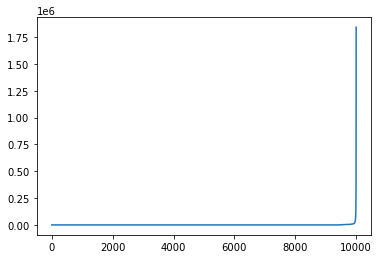

In [4]:
plt.plot(eigen_val)
plt.show()
#eigen value without sorting

[9999 9998 9997 ...    2    1    0]


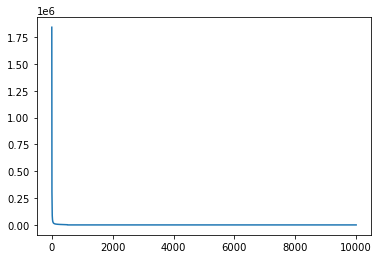

In [5]:
import copy
des = copy.deepcopy(eigen_val)
ind = des.argsort()[::-1]
print(ind) #descending order of eigenvector positions
des_ev = np.sort(des)[::-1]
plt.plot(des_ev)
plt.show()
#sorted eigenvalue plot

In [23]:
pc = eigen_vec[:,9999]
pc = np.c_[pc, eigen_vec[:,9998]]
print(pc.shape)

(10000, 2)


In [24]:
#dimension reduction into 2 dimensions of the mean-centered data
d1 = []

for row in x:
    d1.append(row.dot(pc))
d1 = np.asarray(d1)
print(d1.shape)

(515, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

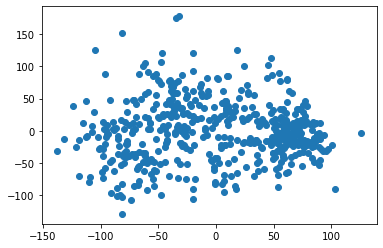

In [25]:
plt.scatter(d1[:,0], d1[:,1])
plt.show

In [9]:
#find the number of required 90% variance
ev_sum = sum(eigen_val)
for i in range(10000):
    tmpsum = sum(des_ev[:i])/ev_sum
    if tmpsum>0.9:
        break
print(i)
print(ev_sum)
print(sum(des_ev[:209]))
print(sum(des_ev[:210]))


210
10259040.102027014
9228942.17405103
9234406.250107741
